<a href="https://colab.research.google.com/github/Timokleia/QCANet/blob/master/QCANet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QCANet 

Note: not possible to run all at once
1. the configuration files need to be changed manually once
2. everytime you run the model you need to change the paths in the results part 

Setup 

In [ ]:
# Mount drive:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Installations and Importations


In [ ]:
import skimage
import matplotlib
import numpy
import os
from shutil import copyfile

!pip install 'cupy-cuda101>=7.7.0,<8.0.0'
!pip install chainer
import chainer

from skimage import io
import matplotlib.pyplot as plt

from tifffile import imwrite
import pandas as pd

import tensorflow as tf
import numpy as np

     |████████████████████████████████| 370.3 MB 34 kB/s 
  Attempting uninstall: cupy-cuda101
    Found existing installation: cupy-cuda101 9.1.0
    Uninstalling cupy-cuda101-9.1.0:
      Successfully uninstalled cupy-cuda101-9.1.0
     |████████████████████████████████| 1.0 MB 7.3 MB/s 
  Created wheel for chainer: filename=chainer-7.8.0-py3-none-any.whl size=967734 sha256=e5781618d2106b720b90045a8eea1148f599d0e00db1f1b21377db80b8687da2
  Stored in directory: /root/.cache/pip/wheels/8d/45/4c/c961846626d4db2511e4acbd5056eefb2aeedcec8208a3ca42
Successfully built chainer


/usr/local/lib/python3.7/dist-packages/chainer/_environment_check.py:75: UserWarning: 
--------------------------------------------------------------------------------
CuPy (cupy-cuda101) version 9.1.0 may not be compatible with this version of Chainer.
Please consider installing the supported version by running:
  $ pip install 'cupy-cuda101>=7.7.0,<8.0.0'

See the following page for more details:
  https://docs.cupy.dev/en/latest/install.html
--------------------------------------------------------------------------------

  requirement=requirement, help=help))


In [ ]:
!python --version

Python 3.7.11


In [ ]:
print(tf.test.gpu_device_name())

/device:GPU:0


Clone the code from github
(should be done once)

In [ ]:
os.chdir("/content/drive/My Drive/")

!if [ -d '/content/drive/My Drive/QCANet' ]; then echo "Directory QCANet already exists"; else echo "Directory QCANet created" && git clone https://github.com/funalab/QCANet.git; fi

#NDN model
if os.path.exists("/content/drive/MyDrive/QCANet/models/learned_ndn.npz")==False:
  !curl -o QCANet/models/learned_ndn.npz https://fun.bio.keio.ac.jp/software/QCANet/learned_ndn.npz
else: print("model learned_ndn already exists")

#NSN model
if os.path.exists("/content/drive/MyDrive/QCANet/models/learned_nsn.npz")==False:
  !curl -o QCANet/models/learned_nsn.npz https://fun.bio.keio.ac.jp/software/QCANet/learned_nsn.npz
else: print("model learned_nsn already exists")

Directory QCANet already exists
model learned_ndn already exists
model learned_nsn already exists


Definition:
Show_layers to check the input and output

In [ ]:
def show_layers(data):
  for i in range(data.shape[0]):
    print("Layer", i)
    io.imshow(data[i])
    io.show()



Set the paths to the data

In [ ]:
# Folder path:
folder_path = "/content/drive/MyDrive/QCANet"

In [ ]:
#First sample
train_raw = "/content/drive/MyDrive/Annotation/Brain1-Sample1/Brain1-Sample1-Raw.tif" # first train volume, raw data
train_lab = "/content/drive/MyDrive/Annotation/Brain1-Sample1/Brain1-Sample1-labels.tif" # first train volume, labels

#Second sample
train2_raw = "/content/drive/MyDrive/Annotation/Brain1-Sample3/Brain1-Sample3-Raw.tif" # second train volume, raw data
train2_lab = "/content/drive/MyDrive/Annotation/Brain1-Sample3/Brain1-Sample3-labels.tif" # second train volume, labels

#Validation sample
test_raw = "/content/drive/MyDrive/Annotation/Brain1-Sample2/Brain1-Sample2-Raw.tif" # test volume, raw data
test_lab = "/content/drive/MyDrive/Annotation/Brain1-Sample2/Brain1-Sample2-labels.tif" # test volume, labels

Create the configuration files

In [ ]:
orig_cfg = folder_path+"/confs/example_train_nsn.cfg" 
dest_cfg = folder_path+"/confs/CFOS_nsn.cfg"

if os.path.exists(dest_cfg):
  print("cfg nsn file already exists")
elif os.path.exists(dest_cfg)==False:
  copyfile(orig_cfg, dest_cfg)


orig_cfg = folder_path+"/confs/example_train_ndn.cfg" 
dest_cfg = folder_path+"/confs/CFOS_ndn.cfg"

if os.path.exists(dest_cfg):
  print("cfg ndn file already exists")
elif os.path.exists(dest_cfg)==False:
  copyfile(orig_cfg, dest_cfg)

cfg nsn file already exists
cfg ndn file already exists


After creating the configuration files you need to manually change:

[Dataset]

root_path = your_dataset

split_list_train = your_dataset/split_list/train.txt

split_list_validation = your_dataset/split_list/validation.txt

input_format = tif

image_dtype = uint16

resolution = (1.0, 1.0, 1.0)

[Runtime]

save_dir = results/result_train_nsn

batchsize = 1

val_batchsize = 1

epoch = 400

gpu = 0

patch_size = (64, 64, 64)

Prepare the right directories in the needed structure

In [ ]:
# Needed structure should be:

# your_dataset/
#        +-- images_raw/  (3D fluorescence microscopic image)
#        |           +-- image1.tif
#        |           +-- image2.tif
#        |           +-- image3.tif
#        +-- images_nsn/  (the ground truth of segmentation)
#        |           +-- image1.tif
#        |           +-- image2.tif
#        |           +-- image3.tif
#        +-- images_ndn/  (the ground truth of detection)
#        |           +-- image1.tif
#        |           +-- image2.tif
#        |           +-- image3.tif

In [ ]:
os.chdir(folder_path)

os.makedirs(folder_path + "/your_dataset/")
os.makedirs(folder_path + "/your_dataset/images_raw/")
os.makedirs(folder_path + "/your_dataset/images_nsn/")
os.makedirs(folder_path + "/your_dataset/images_ndn/")
os.makedirs(folder_path + "/your_dataset/input_gt/")
os.makedirs(folder_path + "/your_dataset/input/")
os.makedirs(folder_path + "/your_dataset/split_list/")

FileExistsError: ignored

**Prepare** **and save the training and validation datasets**

Convert data into 'uint16' /
Crop the data /
Save in the correct structure /
Check if correct

In [ ]:
#first raw data sample
first_sample=io.imread(train_raw)
raw1=first_sample.astype("uint16")
raw1=raw1[300:364,15:79,15:79]
imwrite(folder_path + '/your_dataset/images_raw/Image1.tif', raw1, dtype=raw1.dtype)

In [ ]:
raw1.shape
raw1.mean(), raw1.min(), raw1.max()

(346.88773345947266, 222, 2212)

In [ ]:
show_layers(raw1)

In [ ]:
#first labels for nsn model
labels1=io.imread(train_lab)
nsn_labels1=labels1.astype("uint16")
nsn_labels1=nsn_labels1[300:364,15:79,15:79]
imwrite(folder_path + '/your_dataset/images_nsn/Image1.tif', nsn_labels1, dtype=nsn_labels1.dtype)

In [ ]:
nsn_labels1.shape
nsn_labels1.mean(), nsn_labels1.max(), nsn_labels1.min()

(0.15538787841796875, 149, 0)

In [ ]:
show_layers(nsn_labels1)

In [ ]:
#first labels for ndn model
labels1=io.imread(train_lab)
ndn_labels1=labels1.astype("uint16")
ndn_labels1=ndn_labels1[300:364,15:79,15:79]
imwrite(folder_path + '/your_dataset/images_ndn/Image1.tif', ndn_labels1, dtype=ndn_labels1.dtype)

In [ ]:
ndn.shape
ndn_labels1.mean(), ndn_labels1.max(), ndn_labels1.min()

In [ ]:
show_layers(ndn_labels1)

In [ ]:
#second raw data sample
second_sample=io.imread(train2_raw)
raw2=second_sample.astype("uint16")
raw2=raw2[300:364,15:79,15:79]
imwrite(folder_path + '/your_dataset/images_raw/Image2.tif', raw2, dtype=raw2.dtype)

In [ ]:
raw2.shape
raw2.mean(), raw2.min(), raw2.max()

In [ ]:
show_layers(raw2)

In [ ]:
#second labels for nsn model
labels2=io.imread(train2_lab)
nsn_labels2=labels2.astype("uint16")
nsn_labels2=nsn_labels2[300:364,15:79,15:79]
imwrite(folder_path + '/your_dataset/images_nsn/Image2.tif', nsn_labels2, dtype=nsn_labels2.dtype)

In [ ]:
nsn_labels2.shape
nsn_labels2.mean(), nsn_labels2.max(), nsn_labels2.min()

In [ ]:
show_layers(nsn_labels2)

In [ ]:
#second labels for ndn model
labels2=io.imread(train2_lab)
ndn_labels2=labels2.astype("uint16")
ndn_labels2=ndn_labels2[300:364,15:79,15:79]
imwrite(folder_path + '/your_dataset/images_ndn/Image2.tif', ndn_labels2, dtype=ndn_labels2.dtype)

In [ ]:
ndn_labels2.shape
ndn_labels2.mean(), ndn_labels2.max(), ndn_labels2.min()

In [ ]:
show_layers(ndn_labels2)

In [ ]:
#validation raw data
validation=io.imread(test_raw)
testing_data=validation.astype("uint16")
testing_data=testing_data[300:364,15:79,15:79]
imwrite(folder_path+'/your_dataset/input/CFOS_noisy2.tif', testing_data, dtype=testing_data.dtype)

In [ ]:
testing_data.shape
testing_data.mean(), testing_data.max(), testing_data.min()

In [ ]:
show_layers(testing_data)

In [ ]:
#validation labels
validation_labels=io.imread(test_lab)
testing_labels=validation_labels.astype("uint16")
testing_labels=testing_labels[300:364,15:79,15:79]
imwrite(folder_path + '/your_dataset/input_gt/CFOS_noisy2.tif', testing_labels, dtype=testing_labels.dtype)

In [ ]:
testing_labels.shape
testing_labels.mean(), testing_labels.max(), testing_labels.min()

In [ ]:
show_layers(testing_labels)

Create the split_list files

In [ ]:
f = open(folder_path+"/your_dataset/split_list/train.txt", "x")
f.write("Image1.tif")
f.close()

f = open(folder_path+"/your_dataset/split_list/validation.txt", "x")
f.write("Image2.tif")
f.close()

FileExistsError: ignored

Training 🏋️

In [ ]:
os.chdir(folder_path)
!python src/tools/train.py --conf_file confs/CFOS_nsn.cfg --gpu_id 0

Output Directory not exist! Create...
Output Directory: ./results/result_train_nsn_Aug2Mon_2021_134931
[Dataset]
root_path = your_dataset
input_format = tif
image_dtype = uint16
resolution = (1.0, 1.0, 2.18)
split_list_train = your_dataset/split_list/train.txt
split_list_validation = your_dataset/split_list/validation.txt

[Model]
model = NSN
ndim = 3
lossfun = F.softmax_cross_entropy
ch_in = 12
ch_base = 16
ch_out = 12

[Runtime]
save_dir = results/result_train_nsn
batchsize = 1
val_batchsize = 1
epoch = 400
optimizer = Adam
init_lr = 0.002
weight_decay = 0.0001
gpu = 0
patch_size = (64, 64, 64)
normalization = 0
augmentation = 0
class_weight = (1, 1)
scaling = 1

Loading datasets...
-- train_dataset.size = 1
-- validation_dataset.size = 1
Initializing models...
[epoch 1]
train mean loss=2.6861534118652344
train accuracy=0.7531356811523438, train recall=0.4939550949913644
train precision=0.004419923655864126, specificity=0.7537094030164586
train F-measure=0.008761449621664676, IoU=0.0

In [ ]:
os.chdir(folder_path)
!python src/tools/train.py --conf_file confs/CFOS_ndn.cfg --gpu_id 0

Output Directory not exist! Create...
Output Directory: ./results/result_train_nsn_Aug2Mon_2021_135808
[Dataset]
root_path = your_dataset
input_format = tif
image_dtype = uint16
resolution = (1.0, 1.0, 2.18)
split_list_train = your_dataset/split_list/train.txt
split_list_validation = your_dataset/split_list/validation.txt

[Model]
model = NDN
ndim = 3
lossfun = F.softmax_cross_entropy
ch_in = 12
ch_base = 12
ch_out = 12

[Runtime]
save_dir = results/result_train_nsn
batchsize = 1
val_batchsize = 1
epoch = 400
optimizer = Adam
init_lr = 0.002
weight_decay = 0.0001
gpu = 0
patch_size = (64, 64, 64)
normalization = 0
augmentation = 0
class_weight = (1, 1)
scaling = 1

Loading datasets...
-- train_dataset.size = 1
-- validation_dataset.size = 1
Initializing models...
[epoch 1]
/content/drive/MyDrive/QCANet/src/lib/trainer.py:528: UserWarning: The argument 'neighbors' is deprecated and will be removed in scikit-image 0.18, use 'connectivity' instead. For neighbors=4, use connectivity=1
  ma

Plotting the results

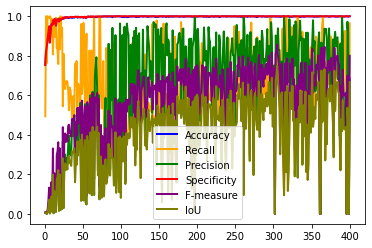

In [ ]:
#go to the results file in the drive (./QCANet/results) and copy paste the path to the latest results file

Train_result = folder_path + "/results/result_train_nsn_Aug2Mon_2021_134931/TrainResult.csv" 

TrainResult = pd.read_csv(Train_result)
TrainResult.head()

plt.plot( 'Epoch', 'Accuracy', data=TrainResult, marker='', color='blue', linewidth=2)
plt.plot( 'Epoch', 'Recall', data=TrainResult, marker='', color='orange', linewidth=2)
plt.plot( 'Epoch', 'Precision', data=TrainResult, marker='', color='green', linewidth=2)
plt.plot( 'Epoch', 'Specificity', data=TrainResult, marker='', color='red', linewidth=2)
plt.plot( 'Epoch', 'F-measure', data=TrainResult, marker='', color='purple', linewidth=2)
plt.plot( 'Epoch', 'IoU', data=TrainResult, marker='', color='olive', linewidth=2)
plt.legend()

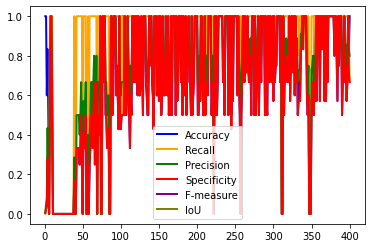

In [ ]:
Train_result = folder_path + "/results/result_train_nsn_Aug2Mon_2021_135808/TrainResult.csv" 

TrainResult = pd.read_csv(Train_result)
TrainResult.head()

plt.plot( 'Epoch', 'Accuracy', data=TrainResult, marker='', color='blue', linewidth=2)
plt.plot( 'Epoch', 'Recall', data=TrainResult, marker='', color='orange', linewidth=2)
plt.plot( 'Epoch', 'Precision', data=TrainResult, marker='', color='green', linewidth=2)
plt.plot( 'Epoch', 'Specificity', data=TrainResult, marker='', color='red', linewidth=2)
plt.plot( 'Epoch', 'F-measure', data=TrainResult, marker='', color='purple', linewidth=2)
plt.plot( 'Epoch', 'IoU', data=TrainResult, marker='', color='olive', linewidth=2)
plt.legend()

Run the trained model on the validation data

In [ ]:
#go to the latest results file in the drive and rename the .npz file to NSN.npz
#add the path to the NSN.npz file in the -ms argument below

!python src/tools/qca_net.py -i your_dataset/input/ -ms results/result_train_nsn_Aug2Mon_2021_134931/NSN.npz -md results/result_train_nsn_Aug2Mon_2021_135808/NDN.npz --gpu 0


Extract the results

In [ ]:
os.chdir(folder_path)

#change the path below to the results file created by the previous command

!python src/tools/extract.py -i results/result_qcanet_Aug2Mon_2021_130813/WatershedSegmentationImages/

Output Directory not exist! Create...
Output Directory: ./results/result_extract_Aug2Mon_2021_130857


Visualisation of the Results

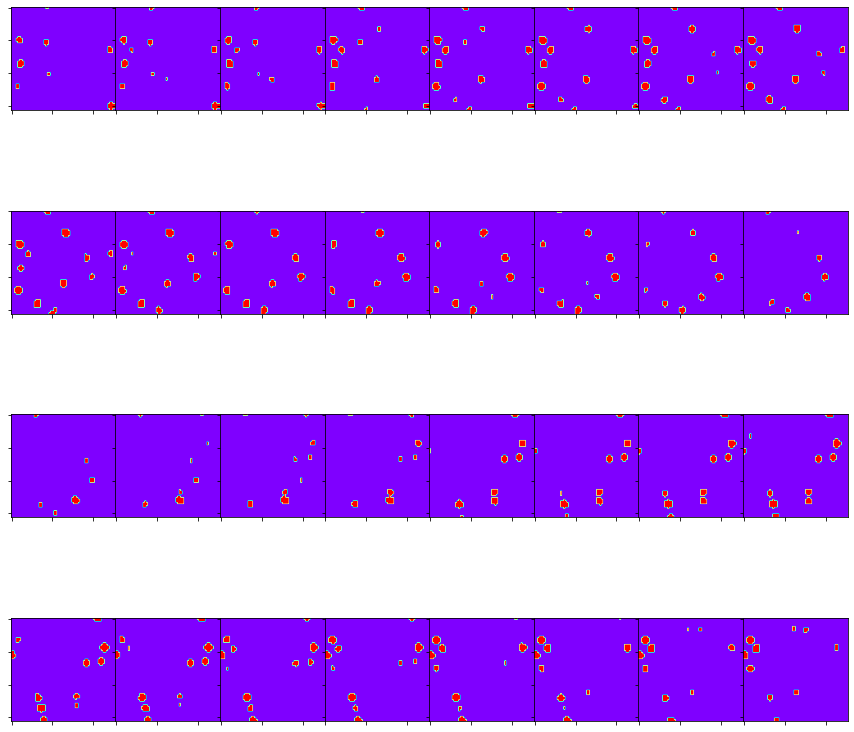

In [ ]:
#Plot the predictions
# add the path to the results (same as the previous command)

results_ = folder_path + "/results/result_qcanet_Aug2Mon_2021_130813/SegmentationImages/CFOS_noisy2.tif"
results=io.imread(results_)

fig = plt.figure(figsize=(15,15))
plt.title('Brain_cells', fontsize = 20)
ax = [plt.subplot(4,8,i+1) for i in range(32)]#398
im_ind = 0
for a in ax:
    a.imshow(results[im_ind,:,:],cmap = "rainbow")
    a.set_xticklabels([])
    a.set_yticklabels([])
    im_ind+=1
plt.subplots_adjust(wspace=0, hspace=0)

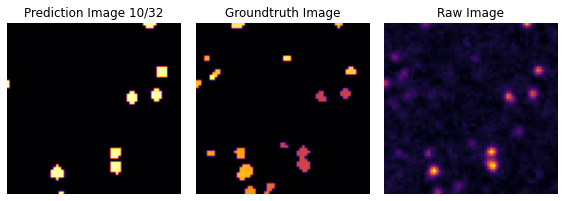

In [ ]:
#Plot the predictions along with the groundtruth and raw data (one layer)
#add the path to the results (same as the previous command)

results_ = folder_path + "/results/result_qcanet_Aug2Mon_2021_130813/SegmentationImages/CFOS_noisy2.tif"
results=io.imread(results_)


data_ = folder_path + "/your_dataset/input_gt/CFOS_noisy2.tif"
data_gt=io.imread(data_)

data_ = folder_path + "/your_dataset/input/CFOS_noisy2.tif"
data_raw=io.imread(data_)


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(results[20], cmap="inferno")
ax1.axis('off')
ax1.set_title('Prediction Image 10/32', fontsize=12)

ax2.imshow(data_gt[20], cmap="inferno")
ax2.axis('off')
ax2.set_title(r'Groundtruth Image', fontsize=12)

ax3.imshow(data_raw[20], cmap="inferno")
ax3.axis('off')
ax3.set_title(r'Raw Image', fontsize=12)

fig.tight_layout()

plt.show()

In [ ]:
#Plot the predictions along with the groundtruth and raw data (all layers)
#add the path to the results (same as the previous command)

def show_result(sample_idx):
  index = sample_idx

  #testing_rawdata_normalized, testing_mask_normalised

  fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(10, 20),
                                      sharex=True, sharey=True)

  ax1.imshow(results[index], cmap="inferno")
  ax1.axis('off')
  ax1.set_title(f'Prediction Image {index}/{results.shape[0]}', fontsize=20)

  ax2.imshow(data_gt[index], cmap="inferno")
  ax2.axis('off')
  ax2.set_title(r'Groundtruth Image', fontsize=20)

  ax3.imshow(data_raw[index], cmap="inferno")
  ax3.axis('off')
  ax3.set_title(r'Raw Image', fontsize=20)

  fig.tight_layout()
  plt.show()

for i in range(results.shape[0]):
  show_result(i)

Compute the IoU and the DICE scores

In [ ]:
results_ = folder_path + "/results/result_qcanet_Aug2Mon_2021_130813/SegmentationImages/CFOS_noisy2.tif"
results=io.imread(results_)
data_ = folder_path + "/your_dataset/input_gt/CFOS_noisy2.tif"
data_gt=io.imread(data_)
data_ = folder_path + "/your_dataset/input/CFOS_noisy2.tif"
data_raw=io.imread(data_)

results[results>0] = 1 # change to binary 
data_gt[data_gt>0] = 1
y_pred = results[:32,:,:].astype("uint8")
y_true = data_gt[:32,:,:].astype("uint8")

axes = (1,2) # W,H axes of each image
intersection = np.sum(np.logical_and(y_pred, y_true), axis=axes)
union = np.sum(np.logical_or(y_pred, y_true), axis=axes)
mask_sum = np.sum(np.abs(y_true), axis=axes) + np.sum(np.abs(y_pred), axis=axes)

smooth = .001
iou = (intersection + smooth) / (union + smooth)
dice = 2 * (intersection + smooth)/(mask_sum + smooth)

iou = np.mean(iou)
dice = np.mean(dice)
print("IoU score is " + str(iou))
print("Dice score is " + str(dice))

IoU score is 0.47300693323003745
Dice score is 0.6353340942249964


3D plots

In [ ]:
z, x, y = results.nonzero()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, alpha=1)

In [ ]:
delta = data_gt

z, x, y = delta.nonzero()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=z, alpha=1)